# Felipe Castillo
http://thinkstats2.com

Assignement week seven

DSC530-T301 Data Exploration and Analysis

In [101]:
from __future__ import print_function, division

import pandas as pd
import numpy as np

import math
import sys
import os
import matplotlib.pyplot as plt

os.chdir ('C:\ExplorartoryDataAnalysis_DSC_530\ThinkStats2\code')
import nsfg
import thinkstats2
import thinkplot
import brfss
import first
#setting working directory to my directory



#sys.path.append('C:\ExplorartoryDataAnalysis_DSC_530\ThinkStats2\code')



In [2]:
preg = nsfg.ReadFemPreg()
preg.head()

,caseid,pregordr,howpreg_n,howpreg_p,moscurrp,nowprgdk,pregend1,pregend2,nbrnaliv,multbrth,...,laborfor_i,religion_i,metro_i,basewgt,adj_mod_basewgt,finalwgt,secu_p,sest,cmintvw,totalwgt_lb
0,1,1,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,3410.389399,3869.349602,6448.271112,2,9,NaN,8.8125
1,1,2,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,3410.389399,3869.349602,6448.271112,2,9,NaN,7.8750
2,2,1,NaN,NaN,NaN,NaN,5.0,NaN,3.0,5.0,...,0,0,0,7226.301740,8567.549110,12999.542264,2,12,NaN,9.1250
3,2,2,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,7226.301740,8567.549110,12999.542264,2,12,NaN,7.0000
4,2,3,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,7226.301740,8567.549110,12999.542264,2,12,NaN,6.1875


In [22]:

pregMothersAge = preg['agepreg']

pregMothersAge.dropna()

0        33.16
1        39.25
2        14.33
3        17.83
4        18.33
         ...  
13588    17.91
13589    18.50
13590    19.75
13591    21.58
13592    21.58
Name: agepreg, Length: 13241, dtype: float64

In [19]:
totalBirthWeight = preg['totalwgt_lb']

totalBirthWeight.dropna()

0        8.8125
1        7.8750
2        9.1250
3        7.0000
4        6.1875
          ...  
13581    6.3750
13584    6.3750
13588    6.1875
13591    7.5000
13592    7.5000
Name: totalwgt_lb, Length: 9038, dtype: float64

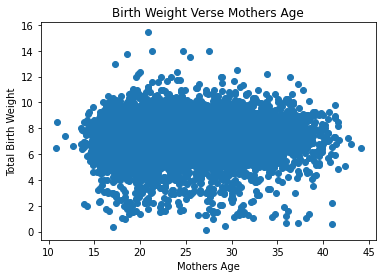

In [5]:
plt.scatter(x=pregMothersAge, y=totalBirthWeight )
plt.title("Birth Weight Verse Mothers Age")
plt.xlabel("Mothers Age")
plt.ylabel("Total Birth Weight")
plt.show()

In [36]:





weight = [totalBirthWeight.quantile(.10)]
print(weight)

[5.6875]


In [78]:
cleaned = preg.dropna(subset=['agepreg', 'totalwgt_lb'])

bins = np.arange(40, 15,60)

indices = np.digitize(cleaned.agepreg, bins)

group = cleaned.groupby(indices)



In [79]:
for i, group in groups:
    print(i, len(group))

1 20
2 393
3 1911
4 2708
5 2396
6 2065
7 1645
8 1120
9 601
10 289
11 80
12 13
13 352


In [49]:
age_preg = [group.agepreg.mean() for i, group in groups]
cdfs = [thinkstats2.Cdf(group.totalwgt_lb) for i, group in groups]






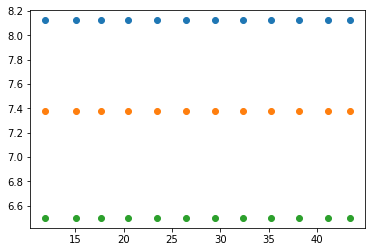

In [80]:
for percent in [.75, .50, .25]:
    
   #totalBirthWeight.quantile(percent)
    
    weight_percentiles =  [totalBirthWeight.quantile(percent) for cdf in cdfs]
    label = '%dth' % percent

    
    plt.scatter(age_preg,  weight_percentiles)
                           
   
                           
    
    
        
    


In [85]:
def SpearmanCorr(xs, ys):
    xs = pd.Series(xs)
    ys = pd.Series(ys)
    return xs.corr(ys, method='spearman')

SpearmanCorr(pregMothersAge,totalBirthWeight)


0.09461004109658226

In [87]:
def PearsonsCorr(xs, ys):
    xs = pd.Series(xs)
    ys = pd.Series(ys)
    return xs.corr(ys)

PearsonsCorr(pregMothersAge,totalBirthWeight)

0.0688339703541091

In [90]:
'''Pearson is around .07  and spermans cor  is .09, the difference shows there might be some outliers. I belivet that age and wait dont have a linear realtionship.  '''

'Pearson is around .07  and spermans cor  is .09, the difference shows there might be some outliers. I belivet that age and wait dont have a linear realtionship.  '

# 8 - 1

In [107]:
import random
def Estimate2(n=3, iters=1100):
    mu = 0
    sigma = 1

    estimates1 = []
    estimates2 = []
    for _ in range(iters):
        xs = [random.gauss(mu, sigma) for i in range(n)]
        biased = np.var(xs)
        unbiased = np.var(xs, ddof=1)
        estimates1.append(biased)
        estimates2.append(unbiased)

    print('mean error biased', MeanError(estimates1, sigma**2))
    print('mean error unbiased', MeanError(estimates2, sigma**2))
    
Estimate2()

mean error biased -0.32106688398873007
mean error unbiased 0.018399674016904875


# 8 - 2

In [98]:

def RMSE(estimates, actual):
   
    e2 = [(estimate-actual)**2 for estimate in estimates]
    mse = np.mean(e2)
    return np.sqrt(mse)




def SimulateSample(mu=90, sigma=7.5, n=9, m=1000):
 
    means = []
    for _ in range(m):
        xs = np.random.normal(mu, sigma, n)
        xbar = np.mean(xs)
        means.append(xbar)


    cdf = thinkstats2.Cdf(means)
    ci = cdf.Percentile(5), cdf.Percentile(90)
    stderr = RMSE(means, mu)
    print('standard error', stderr)


SimulateSample()



standard error 2.465739625835541


In [104]:
def MeanError(estimates, actual):
 
    errors = [estimate-actual for estimate in estimates]
    return np.mean(errors)





def Estimate3(n=10, m=1010):
 
    lam = 2

    means = []
    medians = []
    for _ in range(m):
        xs = np.random.exponential(1/lam, n)
        L = 1 / np.mean(xs)
        Lm = math.log(2) / np.median(xs)
        means.append(L)
        medians.append(Lm)

   
    print('rmse L', RMSE(means, lam))
    print('rmse Lm', RMSE(medians, lam))
    print('mean error L', MeanError(means, lam))
    print('mean error Lm', MeanError(medians, lam))
    
Estimate3()

rmse L 0.8130060502618244
rmse Lm 1.1546280364244281
mean error L 0.21174854551770136
mean error Lm 0.26457592125815604
